# Import libraries

In [2]:
import sys
sys.path.insert(0,'..')

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [3]:
import warnings
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.utils.utils import pd_dict_filt

warnings.filterwarnings('ignore')
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] *2

# Read the (clean) MP3 file

In [4]:
# Read Snapshot metadata
snapshot_context_path = Path("../data/RB_snapshot_context.csv")
snapshot_context_df = pd.read_csv(snapshot_context_path)
snapshot_context_df[['El. Position', 'Phys. Position']] = 0

# Read the (clean) MP3 file
mp3_fpa_df_path = Path("../data/RB_TC_extract_2022_07_07_processed_filled.csv")
mp3_fpa_df = pd.read_csv(mp3_fpa_df_path)
mp3_fpa_df = pd.concat([snapshot_context_df, mp3_fpa_df[mp3_fpa_df['timestamp_fgc'] >= 1526582397220000000]])
mp3_fpa_df_unique = mp3_fpa_df.drop_duplicates(subset=['fpa_identifier'])

len(mp3_fpa_df), len(mp3_fpa_df_unique)

(2992, 646)

In [5]:
mp3_fpa_df_unique['I_Q_kA'] = mp3_fpa_df_unique["I_Q_M"].apply(lambda x: np.round(x / 1e3)*1e3)
mp3_fpa_df_unique['dI_dt_from_data_round'] = mp3_fpa_df_unique["dI_dt_from_data"].apply(lambda x: int(np.round(x)))

mp3_fpa_df_unique['datetime'] = pd.to_datetime(mp3_fpa_df_unique['Date (FGC)'])
mp3_fpa_df_unique['year'] = mp3_fpa_df_unique['datetime'].apply(lambda x: x.year)
mp3_fpa_df_unique['month'] = mp3_fpa_df_unique['datetime'].apply(lambda x: x.month)
mp3_fpa_df_unique['day'] = mp3_fpa_df_unique['datetime'].apply(lambda x: x.day)

In [6]:
mp3_fpa_df_unique

,Unnamed: 0,Unnamed: 0.1,fpa_identifier,Circuit,VoltageNQPS.*U_DIODE,I_Q_M,dt_I_Q_M,dI_dt_from_data,Delta_t(iQPS-PIC),Delta_t(EE_odd-PIC),...,R_2_1,RRR_1_1,RRR_2_1,phys_position,I_Q_kA,dI_dt_from_data_round,datetime,year,month,day
0,0,0,RB_RB.A12_1632928721860000000,RB.A12,0.0,2015.5956,0.02,9.951697,NaN,100.0,...,NaN,NaN,NaN,NaN,2000.0,10,NaT,NaN,NaN,NaN
1,1,1,RB_RB.A12_1647278471500000000,RB.A12,1.0,11000.0100,-40.92,-0.007439,NaN,98.0,...,NaN,NaN,NaN,NaN,11000.0,0,NaT,NaN,NaN,NaN
2,2,2,RB_RB.A12_1647501927640000000,RB.A12,1.0,8000.0054,-21.94,-0.005568,NaN,100.0,...,NaN,NaN,NaN,NaN,8000.0,0,NaT,NaN,NaN,NaN
3,3,3,RB_RB.A12_1647535074160000000,RB.A12,1.0,5039.6710,0.02,9.947738,NaN,98.0,...,NaN,NaN,NaN,NaN,5000.0,10,NaT,NaN,NaN,NaN
4,4,4,RB_RB.A12_1647622982900000000,RB.A12,1.0,5000.0060,-56.46,-0.002120,NaN,100.0,...,NaN,NaN,NaN,NaN,5000.0,0,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959,3959,945,RB_RB.A78_1636740012620000000,RB.A78,NaN,11580.0000,NaN,6.621167,-9.0,93.0,...,3.31,66.667320,66.621019,22.0,12000.0,7,2021-11-12,2021.0,11.0,12.0
3963,3963,928,RB_RB.A78_1636806661040000000,RB.A78,NaN,11594.0000,NaN,3.725729,-11.0,93.0,...,3.22,69.302461,69.302461,5.0,12000.0,4,2021-11-13,2021.0,11.0,13.0
3967,3967,951,RB_RB.A78_1636875606280000000,RB.A78,NaN,11593.0000,NaN,3.982176,-12.0,93.0,...,3.21,70.070186,67.604868,28.0,12000.0,4,2021-11-14,2021.0,11.0,14.0
3972,3972,1060,RB_RB.A78_1636956514140000000,RB.A78,NaN,11597.0000,NaN,2.624106,-10.0,91.0,...,1.74,68.135122,97.968705,137.0,12000.0,3,2021-11-15,2021.0,11.0,15.0


# Read metadata

In [7]:
metadata_path = Path("../data/RB_metadata.csv")
rb_magnet_metadata = pd.read_csv(metadata_path, index_col=False)
# python index starts at 0:
rb_magnet_metadata[['El. Position', 'Phys. Position']] = rb_magnet_metadata[['El. Position', 'Phys. Position']] - 1
rb_magnet_metadata

,Circuit,Magnet,Position,B1_aperture,Diode_type,Correctors,EE place,#Electric_EE,#Electric_circuit,Cryostat,...,age,Manufacturer,Inner cable type,Outer cable type,I_Q_SM18,Renamed short magnet ID,MTF Status,Magnet_construction_order,QPS Crate Number,Cryostat Number
0,RB.A12,MB.A8R1,276.7340,EXT,R,A,EVEN,1,78,LBARE.8R1,...,14.0,3.0,01B,02B8,11488.0,NaN,NaN,288,0,0
1,RB.A12,MB.B8R1,292.3940,EXT,R,B,ODD,77,77,LBBRF.8R1,...,14.0,2.0,01E,02C0,10622.0,NaN,NaN,256,0,1
2,RB.A12,MB.A9R1,315.7990,EXT,R,A,EVEN,2,79,LBARE.9R1,...,14.0,2.0,01E,02C9,12427.0,NaN,NaN,330,1,0
3,RB.A12,MB.B9R1,331.4590,EXT,R,B,ODD,76,76,LBBRG.9R1,...,14.0,2.0,01E,02C9,11155.0,NaN,NaN,319,2,1
4,RB.A12,MB.A10R1,356.2640,EXT,R,A,EVEN,3,80,LBARE.10R1,...,14.0,1.0,01E,02B8,11782.0,NaN,NaN,296,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,RB.A81,MB.A10L1,26302.6192,INT,L,B,ODD,75,75,LBBLG.10L1,...,14.0,3.0,01B,02G,12645.0,NaN,NaN,123,1,1
1228,RB.A81,MB.B9L1,26327.4242,INT,L,A,EVEN,2,79,LBALE.9L1,...,14.0,1.0,01B,02B5,12379.0,NaN,NaN,62,1,0
1229,RB.A81,MB.A9L1,26343.0842,INT,L,B,ODD,76,76,LBBLF.9L1,...,14.0,2.0,01B,02K,11757.0,NaN,NaN,61,2,1
1230,RB.A81,MB.B8L1,26366.4892,INT,L,A,EVEN,1,78,LBALE.8L1,...,14.0,3.0,01B,02G,11656.0,NaN,NaN,172,0,0


In [8]:
rb_magnet_metadata[(rb_magnet_metadata.Circuit=="RB.A78") & rb_magnet_metadata["#Electric_circuit"].isin([14,15,141])].sort_values(by="#Electric_circuit")[["Circuit","Magnet", "#Electric_circuit", "Cryostat"]]

,Circuit,Magnet,#Electric_circuit,Cryostat
1051,RB.A78,MB.A18L8,14,LBBRD.18L8
1049,RB.A78,MB.C18L8,15,LBBRA.18L8
1050,RB.A78,MB.B18L8,141,LBARA.18L8


# Read sort table

In [9]:
# Load sorting data
sort_map_path = Path("../data/circuit_sort.csv")
df_sort_map = pd.read_csv(sort_map_path)
df_sort_map = df_sort_map.set_index(['Circuit', 'El. Quench Position', 'Phys. Quench Position'])

In [10]:
filt = {"Circuit": "RB.A12", "El. Quench Position": 2}
df_sort_subset = pd_dict_filt(df_sort_map, filt).sort_values(by="El. Position").reset_index(drop=True)
df_sort_subset['Phys. Dist. to Quench']  = df_sort_subset['Phys. Dist. to Quench'] - 154 #152
df_sort_subset["El. Dist. to Quench Main"] = df_sort_subset["El. Dist. to Quench Main"] - 77 #78
df_sort_subset["El. Dist. to Quench Mirror"] = df_sort_subset["El. Dist. to Quench Mirror"] - 76

df_sort_subset.T

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
Magnet,MB.A8L2,MB.A9L2,MB.A10L2,MB.A11L2,MB.A12L2,MB.C12L2,MB.B13L2,MB.A14L2,MB.C14L2,MB.B15L2,...,MB.C15L2,MB.A15L2,MB.B14L2,MB.C13L2,MB.A13L2,MB.B12L2,MB.B11L2,MB.B10L2,MB.B9L2,MB.B8L2
El. Position,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
Phys. Position,153,151,149,147,145,143,141,139,137,135,...,134,136,138,140,142,144,146,148,150,152
Phys. Dist. to PC,0,2,4,6,8,10,12,14,16,18,...,19,17,15,13,11,9,7,5,3,1
Phys. Position ODD,153,151,149,147,145,143,141,139,137,135,...,134,136,138,140,142,144,146,148,150,152
Phys. Position EVEN,1,3,5,7,9,11,13,15,17,19,...,18,16,14,12,10,8,6,4,2,0
Phys. Dist. to Quench,4,2,0,-2,-4,-6,-8,-10,-12,-14,...,-15,-13,-11,-9,-7,-5,-3,-1,1,3
El. Dist. to Quench Main,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
El. Dist. to Quench Mirror,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.0,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0


In [11]:
filt = {"Circuit": "RB.A23", "El. Quench Position": 2}
df_sort_subset = pd_dict_filt(df_sort_map, filt).sort_values(by="El. Position").reset_index(drop=True)
df_sort_subset['Phys. Dist. to Quench']  = df_sort_subset['Phys. Dist. to Quench'] - 154 #152
df_sort_subset["El. Dist. to Quench Main"] = df_sort_subset["El. Dist. to Quench Main"] - 77 #78
df_sort_subset["El. Dist. to Quench Mirror"] = df_sort_subset["El. Dist. to Quench Mirror"] - 76#7.5

df_sort_subset.T

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
Magnet,MB.B8R2,MB.B9R2,MB.B10R2,MB.B11R2,MB.B12R2,MB.A13R2,MB.C13R2,MB.B14R2,MB.A15R2,MB.C15R2,...,MB.B15R2,MB.C14R2,MB.A14R2,MB.B13R2,MB.C12R2,MB.A12R2,MB.A11R2,MB.A10R2,MB.A9R2,MB.A8R2
El. Position,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
Phys. Position,1,3,5,7,9,11,13,15,17,19,...,18,16,14,12,10,8,6,4,2,0
Phys. Dist. to PC,1,3,5,7,9,11,13,15,17,19,...,18,16,14,12,10,8,6,4,2,0
Phys. Position ODD,153,151,149,147,145,143,141,139,137,135,...,134,136,138,140,142,144,146,148,150,152
Phys. Position EVEN,1,3,5,7,9,11,13,15,17,19,...,18,16,14,12,10,8,6,4,2,0
Phys. Dist. to Quench,-4,-2,0,2,4,6,8,10,12,14,...,13,11,9,7,5,3,1,-1,-3,-5
El. Dist. to Quench Main,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
El. Dist. to Quench Mirror,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.0,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0


# Read masterfile MB_feature_analysis

In [12]:
master_file_path = Path("../data/analysis_conductor_fieldQuality_FPA2021_FTM2023_year2021_FPA2021_TFM2023.csv")
df_master_file = pd.read_csv(master_file_path, index_col=False)

empty_columns = df_master_file.columns[df_master_file.isnull().all()]
df_master_file = df_master_file.drop(columns = empty_columns)
df_master_file['Magnet'] = df_master_file.positions.apply(lambda x: 'MB.'+x)

# Load description of context variables

In [13]:
df_feature_context = pd.read_excel("../data/metadata_context_variables.xlsx", engine='openpyxl', index_col="Unnamed: 0")

# Load Data

In [14]:
df_comp = pd.read_csv("../data/final_components/cweights_trend.csv")

In [15]:
fpa_identifiers_fitted = np.unique(df_comp.fpa_identifier.values)
fpa_identifiers = mp3_fpa_df_unique.loc[mp3_fpa_df_unique.fpa_identifier.isin(fpa_identifiers_fitted), "fpa_identifier"].values    

len(fpa_identifiers_fitted), len(fpa_identifiers)

(699, 617)

# Analyze subset

In [16]:
df = pd.read_csv('../data/correlation_tables/correlation_table.csv', index_col="Unnamed: 0")

In [17]:
df["El. Dist. to Quench Main"] = df["El. Dist. to Quench Main"] - 77 
df["El. Dist. to Quench Mirror"] = df["El. Dist. to Quench Mirror"] - 76
df['Phys. Dist. to Quench'] = df['Phys. Dist. to Quench'] - 154

fpa_snapshots = snapshot_context_df.fpa_identifier.values
df.loc[df.fpa_identifier.isin(fpa_snapshots), "is_snapshot"] = 1
df.loc[~df.fpa_identifier.isin(fpa_snapshots), "is_snapshot"] = 0

fpa_sec_1EE = mp3_fpa_df[(mp3_fpa_df['Delta_t(iQPS-PIC)'] / 1000 > 0.2) & (mp3_fpa_df['Delta_t(iQPS-PIC)'] / 1000 < 0.5)].drop_duplicates(subset=['fpa_identifier']).fpa_identifier #0.5
# sum(df_to_corr.fpa_identifier.isin(fpa_sec_1EE)), sum(~df_to_corr.fpa_identifier.isin(fpa_sec_1EE))
df.loc[df.fpa_identifier.isin(fpa_sec_1EE), "D_open_1EE"] = 1
df.loc[~df.fpa_identifier.isin(fpa_sec_1EE), "D_open_1EE"] = 0


df['dAC_abs'] = df['dAC'].apply(lambda x: np.abs(x))

my_columns = df_comp.drop(columns =['fpa_identifier','1EE']).columns

In [18]:
df_subset = df.groupby("fpa_identifier")[["3Hz_meas_log", "6Hz_meas_log"]].max()

fpa_EMP = df_subset[(df_subset['3Hz_meas_log'] > -1.2) & (df_subset['6Hz_meas_log'] > -1.4)].index
df.loc[df.fpa_identifier.isin(fpa_EMP), "is_EMP"] = 1
df.loc[~df.fpa_identifier.isin(fpa_EMP), "is_EMP"] = 0

# plot histograms

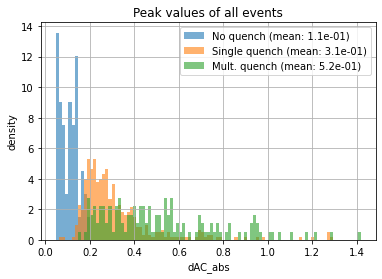

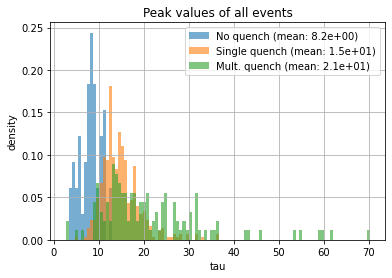

In [19]:
for column in ['dAC_abs', 'tau']:
        
    df_log = df.groupby("fpa_identifier")[column].max()
    bins = np.linspace(df_log.min(),df_log.max(), 100)
    
    
    fig, ax = plt.subplots()
    
    df_no_q = df[(df["is_snapshot"]==1)].groupby("fpa_identifier")[column].max()
    df_q = df[(df["no_sec_q"]==1) & (df["is_snapshot"]==0)].groupby("fpa_identifier")[column].max()
    df_mult_q = df[(df["no_sec_q"]==0) & (df["is_snapshot"]==0)].groupby("fpa_identifier")[column].max()
    
    
    df_no_q.hist(ax=ax, bins=bins, alpha=0.6, density =True, label=f"No quench (mean: {df_no_q.mean():.1e})")
    df_q.hist(ax=ax, bins=bins, alpha=0.6, density =True, label=f"Single quench (mean: {df_q.mean():.1e})")
    df_mult_q.hist(ax=ax, bins=bins, alpha=0.6, density =True, label=f"Mult. quench (mean: {df_mult_q.mean():.1e})")

    plt.title(f"Peak values of all events")
    plt.legend()
    plt.ylabel("density")
    plt.xlabel(column)

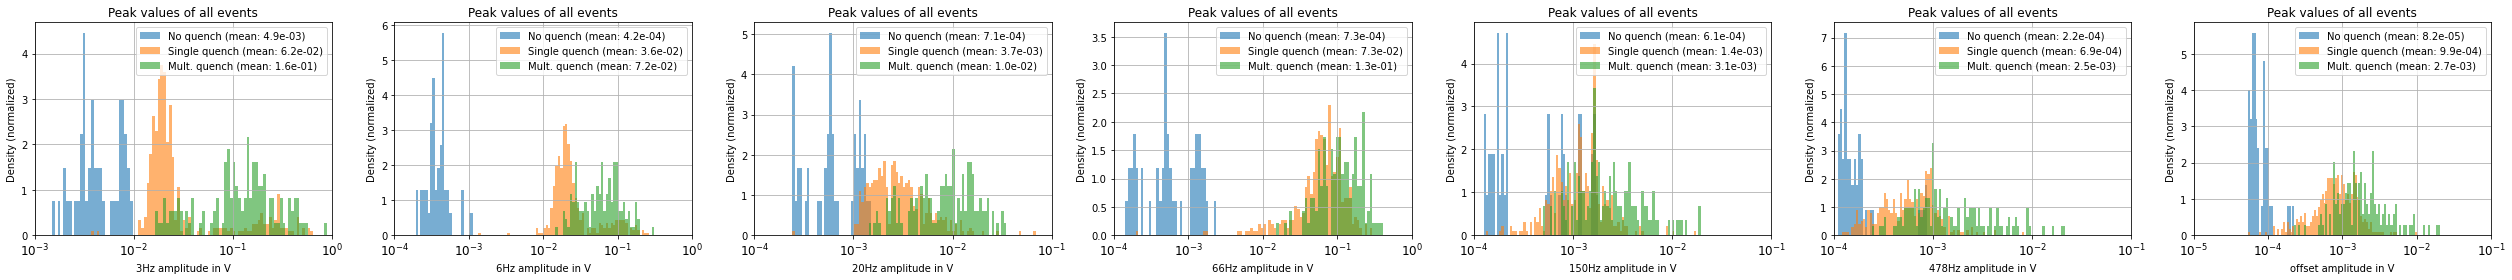

In [20]:
plot_columns = df_comp.filter(regex="meas(?!_)(?!ured_log)").columns
fig, axes = plt.subplots(1, len(plot_columns), figsize=(5*len(plot_columns),4))

for ax, column in zip(axes, plot_columns):
    df_log = df.groupby("fpa_identifier")[column+"_log"].max()
    
    df_no_q_log = df[(df["is_snapshot"]==1)].groupby("fpa_identifier")[column+"_log"].max()
    df_q_log  = df[(df["no_sec_q"]==1) & (df["is_snapshot"]==0)].groupby("fpa_identifier")[column+"_log"].max()
    df_mult_q_log  = df[(df["no_sec_q"]==0) & (df["is_snapshot"]==0)].groupby("fpa_identifier")[column+"_log"].max()
    
    df_no_q = df[(df["is_snapshot"]==1)].groupby("fpa_identifier")[column].max()
    df_q = df[(df["no_sec_q"]==1) & (df["is_snapshot"]==0)].groupby("fpa_identifier")[column].max()
    df_mult_q = df[(df["no_sec_q"]==0) & (df["is_snapshot"]==0)].groupby("fpa_identifier")[column].max()
    
    bins = np.linspace(df_log.min(), df_log.max(), 100)
    
    df_no_q_log.hist(ax=ax, bins= bins  , alpha=0.6, density =True, label=f"No quench (mean: {df_no_q.mean():.1e})")
    df_q_log.hist(ax=ax, bins=bins, alpha=0.6, density =True, label=f"Single quench (mean: {df_q.mean():.1e})")
    df_mult_q_log.hist(ax=ax, bins=bins, alpha=0.6, density =True, label=f"Mult. quench (mean: {df_mult_q.mean():.1e})")

    
    ax.set_title(f"Peak values of all events") # {df.groupby('fpa_identifier')[column].max().mean():.1e}")
    ax.legend()
    ax.set_ylabel("Density (normalized)")
    ax.set_xlabel(column.split("_")[0] + " amplitude in V")
    
    
    xlim = int(np.floor(df_log.min())), int(df_log.max())
    ax.set_xlim(xlim)
    
    xticks = np.arange(xlim[0], xlim[1]+1)
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"$10^{{{n}}}$" for n in xticks], fontsize="large")
plt.tight_layout()

# 3 Hz

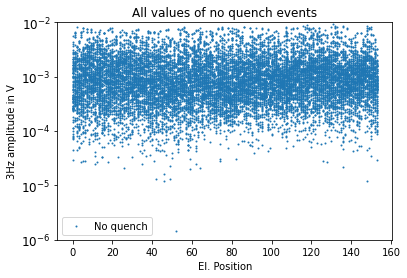

In [21]:
fig, ax = plt.subplots()
df[(df["is_snapshot"] == 1)].plot.scatter(ax = ax, x="El. Position", y="3Hz_meas_log", label="No quench", s=1, c=default_colors[0])
plt.title("All values of no quench events")
plt.ylabel("3Hz amplitude in V")

df_lim = df.loc[(df["is_snapshot"] == 1), "3Hz_meas_log"]
lim = int(np.floor(df_lim.min())), int(df_lim.max())
ax.set_ylim(lim)
ticks = np.arange(lim[0], lim[1]+1)
ax.set_yticks(ticks)
ax.set_yticklabels([f"$10^{{{n}}}$" for n in ticks], fontsize="large")
plt.show()

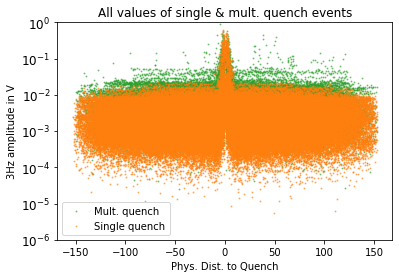

In [22]:
fig, ax = plt.subplots()
df[(df["no_sec_q"] == 0)& (df["is_snapshot"] == 0)].plot.scatter(ax=ax,x="Phys. Dist. to Quench", y="3Hz_meas_log", label="Mult. quench", s=1, c=default_colors[2], alpha =0.5)
df[(df["no_sec_q"] == 1)& (df["is_snapshot"] == 0)].plot.scatter(ax=ax,x="Phys. Dist. to Quench", y="3Hz_meas_log", label="Single quench", s=1, c=default_colors[1], alpha =0.5)
plt.title("All values of single & mult. quench events")

plt.ylabel("3Hz amplitude in V")
df_lim = df.loc[(df["is_snapshot"] == 0), "3Hz_meas_log"]
lim = int(np.floor(df_lim.min())), int(df_lim.max())
ax.set_ylim(lim)
ticks = np.arange(lim[0], lim[1]+1)
ax.set_yticks(ticks)
ax.set_yticklabels([f"$10^{{{n}}}$" for n in ticks], fontsize="large")
plt.show()

(-10.0, 10.0)

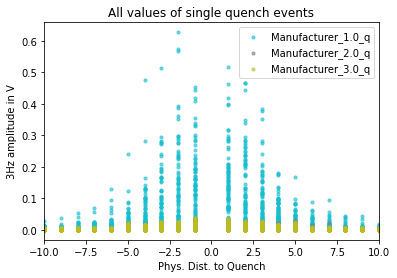

In [23]:
fig, ax = plt.subplots()
df[(df["no_sec_q"] == 1)&(df["1EE"]==1) & (df["Manufacturer_1.0_q"]==1)].plot.scatter(ax=ax, x="Phys. Dist. to Quench", y="3Hz_meas", label="Manufacturer_1.0_q", s=10, c=default_colors[9], alpha=0.6)
df[(df["no_sec_q"] == 1)&(df["1EE"]==1) & (df["Manufacturer_2.0_q"]==1)].plot.scatter(ax=ax, x="Phys. Dist. to Quench", y="3Hz_meas", label="Manufacturer_2.0_q", s=10, c=default_colors[7], alpha=0.6)
df[(df["no_sec_q"] == 1)&(df["1EE"]==1) & (df["Manufacturer_3.0_q"]==1)].plot.scatter(ax=ax, x="Phys. Dist. to Quench", y="3Hz_meas", label="Manufacturer_3.0_q", s=10, c=default_colors[8], alpha=0.6)

plt.title("All values of single quench events")
plt.ylabel("3Hz amplitude in V")
xlim = (-10, 10)
plt.xlim(xlim)

In [24]:
df_quenched_magnet_features = mp3_fpa_df_unique.merge(df_master_file, left_on="Position", right_on="positions", suffixes=('', '_y'))
df_3Hz_meas_log_max = df[(df["is_snapshot"] == 0)& (df["no_sec_q"] == 1)& (df["1EE"]==1)].groupby("fpa_identifier")["3Hz_meas_log"].max().reset_index()
df_6Hz_meas_log_max = df[(df["is_snapshot"] == 0)& (df["no_sec_q"] == 1)& (df["1EE"]==1)].groupby("fpa_identifier")["6Hz_meas_log"].max().reset_index()
df_quenched_magnet = df_quenched_magnet_features.merge(df_3Hz_meas_log_max, on=["fpa_identifier"], suffixes=('', '_y'))
df_quenched_magnet = df_quenched_magnet.merge(df_6Hz_meas_log_max, on=["fpa_identifier"], suffixes=('', '_y'))

In [25]:
df_corr = df_quenched_magnet.corr()
df_corr.sort_values(by="3Hz_meas_log",ascending=False)["3Hz_meas_log"].head(20)

3Hz_meas_log                  1.000000
6Hz_meas_log                  0.916402
phi_magnet_3000Hz             0.839427
phi_ApA_10000Hz               0.833947
phi_ApB_10000Hz               0.830627
phi_magnet_10000Hz            0.794587
magnetic_length_ave           0.756433
b9_ave                        0.705842
b5_ave                        0.671496
b2_diff                       0.667360
CAB_RC_AVG_outer_ave          0.556066
EXTR_STR_RRR_AVG_outer_ave    0.494833
CAB_IC_19_inner_diff          0.453780
CAB_IC_19_outer_ave           0.449025
STDV_CMM_THICK_outer_ave      0.382058
STR_TW_PITCH_AVG_outer_ave    0.379836
I_Q_kA                        0.331586
MIITS_circ                    0.319140
CAB_IC_19_outer_diff          0.319083
I_end_2_from_data             0.309720
Name: 3Hz_meas_log, dtype: float64

Text(0.5, 0, '3Hz amplitude in V')

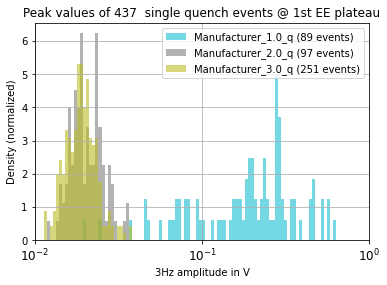

In [26]:
bins= np.linspace(-2, -0.2, 100)

fig, ax = plt.subplots()
df_quenched_magnet.loc[df_quenched_magnet.Manufacturer==1, "3Hz_meas_log"].hist(ax=ax, bins=bins, alpha=0.6, density =True, label=f"Manufacturer_1.0_q ({(sum(df_quenched_magnet.Manufacturer==1))} events)", color=default_colors[9])
df_quenched_magnet.loc[df_quenched_magnet.Manufacturer==2, "3Hz_meas_log"].hist(ax=ax, bins=bins, alpha=0.6, density =True, label=f"Manufacturer_2.0_q ({(sum(df_quenched_magnet.Manufacturer==2))} events)", color=default_colors[7])
df_quenched_magnet.loc[df_quenched_magnet.Manufacturer==3, "3Hz_meas_log"].hist(ax=ax, bins=bins, alpha=0.6, density =True, label=f"Manufacturer_3.0_q ({(sum(df_quenched_magnet.Manufacturer==3))} events)", color=default_colors[8])

plt.legend()
plt.title(f"Peak values of {len(df_quenched_magnet)}  single quench events @ 1st EE plateau")
plt.ylabel("Density (normalized)")
plt.xlabel("3Hz_meas_log")
#plt.yscale("log")

df_log = df_quenched_magnet["3Hz_meas_log"]
xlim = -2, int(df_log.max())
ax.set_xlim(xlim)

xticks = np.arange(xlim[0], xlim[1]+1)
ax.set_xticks(xticks)
ax.set_xticklabels([f"$10^{{{n}}}$" for n in xticks], fontsize="large")
ax.set_xlabel("3Hz amplitude in V")

In [27]:
# crosscheck
magnet_values = mp3_fpa_df_unique.loc[mp3_fpa_df_unique.fpa_identifier.isin(["RB_RB.A12_1619462088820000000", "RB_RB.A12_1619935955860000000", "RB_RB.A45_1620232873800000000"]), "Magnet"].values
magnet_values, rb_magnet_metadata.loc[rb_magnet_metadata.Magnet.isin(magnet_values), "Manufacturer"]

(array(['MB.C32L2', 'MB.C14L2', 'MB.B33R4'], dtype=object),
 83     1.0
 137    1.0
 534    1.0
 Name: Manufacturer, dtype: float64)

# Look at primary quenched magnets which lead to fast sec quenches
test_conditions = ((mp3_fpa_df['Delta_t(iQPS-PIC)'] / 1000 < 5) &
                    (mp3_fpa_df['Nr in Q event'].astype(str) != '1'))

bool_fast_sec_quench = mp3_fpa_df_unique.fpa_identifier.isin(mp3_fpa_df[test_conditions].fpa_identifier)

mp3_fpa_df_unique.loc[bool_fast_sec_quench, "Manufacturer"].hist()

# 6 Hz

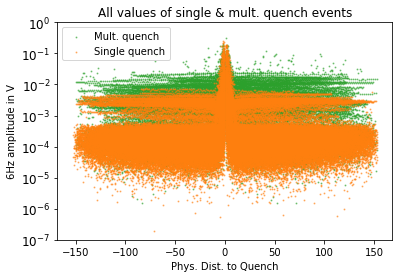

In [28]:
fig, ax = plt.subplots()
df[(df["no_sec_q"] == 0)& (df["is_snapshot"] == 0)].plot.scatter(ax=ax,x="Phys. Dist. to Quench", y="6Hz_meas_log", label="Mult. quench", s=1, c=default_colors[2], alpha =0.5)
df[(df["no_sec_q"] == 1)& (df["is_snapshot"] == 0)].plot.scatter(ax=ax,x="Phys. Dist. to Quench", y="6Hz_meas_log", label="Single quench", s=1, c=default_colors[1], alpha =0.5)
plt.title("All values of single & mult. quench events")

plt.ylabel("6Hz amplitude in V")
df_lim = df.loc[(df["is_snapshot"] == 0), "6Hz_meas_log"]
lim = int(np.floor(df_lim.min())), int(df_lim.max())
ax.set_ylim(lim)
ticks = np.arange(lim[0], lim[1]+1)
ax.set_yticks(ticks)
ax.set_yticklabels([f"$10^{{{n}}}$" for n in ticks], fontsize="large")

plt.show()

(-10.0, 10.0)

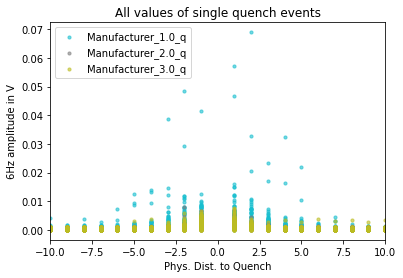

In [41]:
fig, ax = plt.subplots()
df[(df["no_sec_q"] == 1)&(df["1EE"]==1) & (df["Manufacturer_1.0_q"]==1)].plot.scatter(ax=ax, x="Phys. Dist. to Quench", y="6Hz_meas", label="Manufacturer_1.0_q", s=10, c=default_colors[9], alpha=0.6)
df[(df["no_sec_q"] == 1)&(df["1EE"]==1) & (df["Manufacturer_2.0_q"]==1)].plot.scatter(ax=ax, x="Phys. Dist. to Quench", y="6Hz_meas", label="Manufacturer_2.0_q", s=10, c=default_colors[7], alpha=0.6)
df[(df["no_sec_q"] == 1)&(df["1EE"]==1) & (df["Manufacturer_3.0_q"]==1)].plot.scatter(ax=ax, x="Phys. Dist. to Quench", y="6Hz_meas", label="Manufacturer_3.0_q", s=10, c=default_colors[8], alpha=0.6)

plt.title("All values of single quench events")
plt.ylabel("6Hz amplitude in V")
xlim = (-10, 10)
plt.xlim(xlim)


[Text(-3, 0, '$10^{-3}$'),
 Text(-2, 0, '$10^{-2}$'),
 Text(-1, 0, '$10^{-1}$'),
 Text(0, 0, '$10^{0}$')]

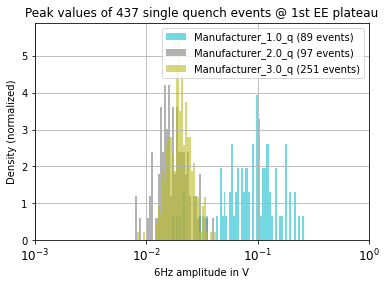

In [30]:
fig, ax = plt.subplots()
bins= np.linspace(-2.2, -0.5, 100)
df_quenched_magnet.loc[df_quenched_magnet.Manufacturer==1, "6Hz_meas_log"].hist(ax=ax, bins=bins, alpha=0.6, density =True, label=f"Manufacturer_1.0_q ({(sum(df_quenched_magnet.Manufacturer==1))} events)", color=default_colors[9])
df_quenched_magnet.loc[df_quenched_magnet.Manufacturer==2, "6Hz_meas_log"].hist(ax=ax, bins=bins, alpha=0.6, density =True, label=f"Manufacturer_2.0_q ({(sum(df_quenched_magnet.Manufacturer==2))} events)", color=default_colors[7])
df_quenched_magnet.loc[df_quenched_magnet.Manufacturer==3, "6Hz_meas_log"].hist(ax=ax, bins=bins, alpha=0.6, density =True, label=f"Manufacturer_3.0_q ({(sum(df_quenched_magnet.Manufacturer==3))} events)", color=default_colors[8])

plt.legend()
plt.title(f"Peak values of {len(df_quenched_magnet)} single quench events @ 1st EE plateau")
plt.ylabel("Density (normalized)")
plt.xlabel("6Hz amplitude in V")

df_log = df_quenched_magnet["3Hz_meas_log"]
xlim = -3, int(df_log.max())
ax.set_xlim(xlim)

xticks = np.arange(xlim[0], xlim[1]+1)
ax.set_xticks(xticks)
ax.set_xticklabels([f"$10^{{{n}}}$" for n in xticks], fontsize="large")

# 20 Hz

In [31]:
bool_basis = (snapshot_context_df.I_Q_M > 10500) 

fpa_basis = snapshot_context_df.fpa_identifier.values
print(len(fpa_basis))

df_to_corr = df[df.fpa_identifier.isin(fpa_basis) & (df["no_sec_q"] == 1)] 

64


In [32]:
df_to_corr[(df_to_corr.dI_dt_from_data > 2) & (df_to_corr.I_Q_M > 10500)].groupby("fpa_identifier")["20Hz_meas"].max().mean()

0.0011879169508320377

Text(0, 0.5, '20Hz amplitude in V')

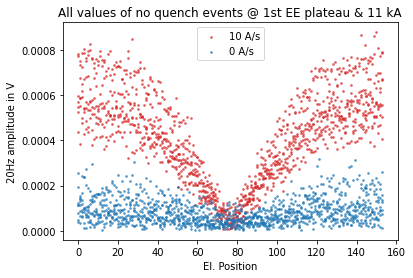

In [33]:
fig, ax = plt.subplots()
df_to_corr[(df_to_corr["1EE"] == 1) & (df_to_corr.dI_dt_from_data > 2) & (df_to_corr.I_Q_M > 10500)].plot.scatter(ax=ax, x="El. Position", y="20Hz_meas", label="10 A/s", s=3, c=default_colors[3], alpha=0.6)
df_to_corr[(df_to_corr["1EE"] == 1) & (df_to_corr.dI_dt_from_data < 2)& (df_to_corr.I_Q_M > 10500)].plot.scatter(ax=ax, x="El. Position", y="20Hz_meas", label="0 A/s", s=3, c=default_colors[10], alpha=0.6)

plt.title(f"All values of no quench events @ 1st EE plateau & 11 kA")

plt.ylabel("20Hz amplitude in V")

Text(0, 0.5, '20Hz amplitude in V')

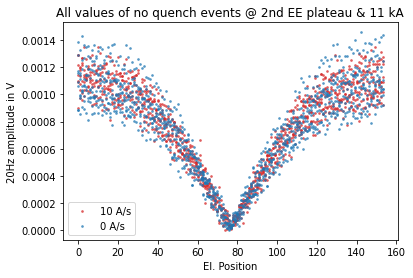

In [34]:
fig, ax = plt.subplots()
df_to_corr[(df_to_corr["2EE"] == 1) & (df_to_corr.dI_dt_from_data > 2)& (df_to_corr.I_Q_M > 10500)].plot.scatter(ax=ax, x="El. Position", y="20Hz_meas", label="10 A/s", s=3, c=default_colors[3], alpha=0.6)
df_to_corr[(df_to_corr["2EE"] == 1) & (df_to_corr.dI_dt_from_data < 2)& (df_to_corr.I_Q_M > 10500)].plot.scatter(ax=ax, x="El. Position", y="20Hz_meas", label="0 A/s", s=3, c=default_colors[10], alpha=0.6)

plt.title(f"All values of no quench events @ 2nd EE plateau & 11 kA")

plt.ylabel("20Hz amplitude in V")

Text(0.5, 1.0, 'Peak values of no quench events, averaged over circuits')

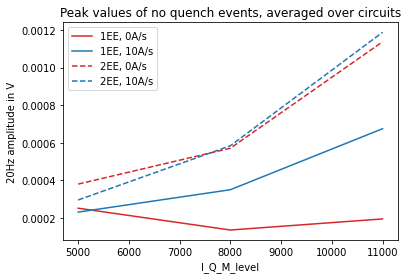

In [35]:
df_result = pd.DataFrame()

df_to_corr['I_Q_kA'] = df_to_corr["I_Q_M"].apply(lambda x: np.round(x / 1e3)*1e3)
df_to_corr['dI_dt_round'] = df_to_corr["dI_dt_from_data"].apply(lambda x: np.round(x / 1e1)*1e1)

EE_levels = [1, 0]
dI_dt_levels = [0, 10]
I_Q_M_levels = [5000, 8000, 11000]

i =0
for EE in EE_levels:
    for di in dI_dt_levels:
        for iqm in I_Q_M_levels:
            df_result.loc[i, ["EE_level", "dI_dt_level", "I_Q_M_level"]] = EE, di, iqm
            
            df_result.loc[i, "20Hz_meas"] = df_to_corr[(df_to_corr["1EE"] == EE) & (df_to_corr.dI_dt_round == di) & (df_to_corr.I_Q_kA == iqm)].groupby("fpa_identifier")[["20Hz_meas"]].max().mean().values
            i+=1

fig, ax = plt.subplots()
for e, EE in enumerate(EE_levels):
    for i, di in enumerate(dI_dt_levels):
        df_result[(df_result["EE_level"] == EE) & (df_result.dI_dt_level == di)].plot(ax=ax, x ="I_Q_M_level", y="20Hz_meas", label=f"{int(2-EE)}EE, {di}A/s", ls=["-","--"][e], c=default_colors[[3,10][i]])
        
plt.ylabel("20Hz amplitude in V")
plt.title("Peak values of no quench events, averaged over circuits")

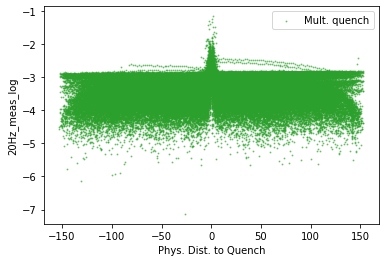

In [40]:
df[(df["no_sec_q"] == 1)& (df["is_snapshot"] == 0)].plot.scatter(x="Phys. Dist. to Quench", y="20Hz_meas_log", label="single quench", s=1, c=default_colors[2], alpha =0.5)
plt.show()

# 20 Hz sec quench

Text(0.5, 1.0, 'Peak values of all events')

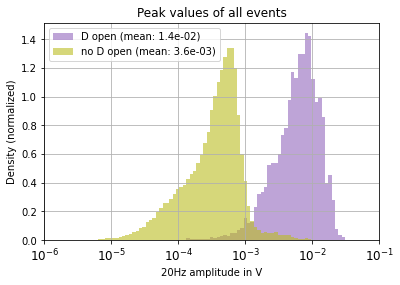

In [65]:
df_to_corr = df[(df["1EE"] == 1)] 

fig, ax  = plt.subplots()
df_lim = df_to_corr["20Hz_meas_log"]
xlim = -6, int(df_lim.max())
ax.set_xlim(xlim)

xticks = np.arange(xlim[0], xlim[1]+1)
ax.set_xticks(xticks)
ax.set_xticklabels([f"$10^{{{n}}}$" for n in xticks], fontsize="large")

bins = np.linspace(xlim[0], xlim[1], 100)

mean_open = df_to_corr[(df_to_corr["D_open_1EE"]==1)].groupby("fpa_identifier")["20Hz_meas"].max().mean()
mean_closed = df_to_corr[(df_to_corr["D_open_1EE"]==0)].groupby("fpa_identifier")["20Hz_meas"].max().mean()

df_to_corr.loc[df_to_corr["D_open_1EE"]==1, "20Hz_meas_log"].hist(ax=ax, bins=bins, alpha=0.6, density =True, label=f"D open (mean: {mean_open:.1e})",color=default_colors[4])
df_to_corr.loc[df_to_corr["D_open_1EE"]==0, "20Hz_meas_log"].hist(ax=ax, bins=bins, alpha=0.6, density =True, label=f"no D open (mean: {mean_closed:.1e})",color=default_colors[8])

plt.legend()
plt.ylabel("Density (normalized)")
plt.xlabel("20Hz amplitude in V")
plt.title("Peak values of all events")
#plt.yscale("log")

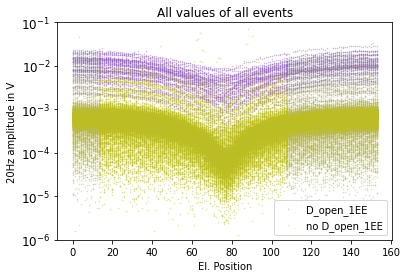

In [66]:
fig, ax = plt.subplots()
df_to_corr[(df_to_corr["D_open_1EE"] == 1)].plot.scatter(ax= ax,x="El. Position", y="20Hz_meas_log", label="D_open_1EE", s=0.2,c=default_colors[4], alpha=0.5)
df_to_corr[(df_to_corr["D_open_1EE"] == 0)].plot.scatter(ax= ax,x="El. Position", y="20Hz_meas_log", label="no D_open_1EE", s=0.2, c=default_colors[8], alpha=0.5)

plt.title("All values of all events")
plt.ylabel("20Hz amplitude in V")
df_lim = df.loc[(df["is_snapshot"] == 0), "20Hz_meas_log"]
lim = -6, int(df_lim.max())
ax.set_ylim(lim)
ticks = np.arange(lim[0], lim[1]+1)
ax.set_yticks(ticks)
ax.set_yticklabels([f"$10^{{{n}}}$" for n in ticks], fontsize="large")
plt.show()

# 66 Hz

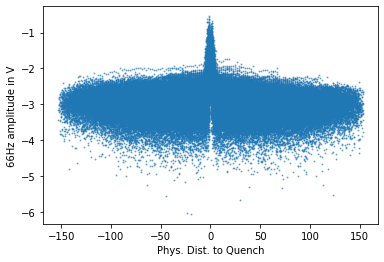

In [37]:
df[(df["no_sec_q"]==1)].plot.scatter(x="Phys. Dist. to Quench", y="66Hz_meas_log", s=1, alpha=0.5)


plt.ylabel("66Hz amplitude in V")
df_lim = df.loc[(df["is_snapshot"] == 0), "66Hz_meas_log"]
lim = -5, int(df_lim.max())
ax.set_ylim(lim)
ticks = np.arange(lim[0], lim[1]+1)
ax.set_yticks(ticks)
ax.set_yticklabels([f"$10^{{{n}}}$" for n in ticks], fontsize="large")
plt.show()

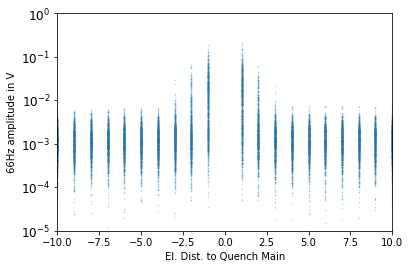

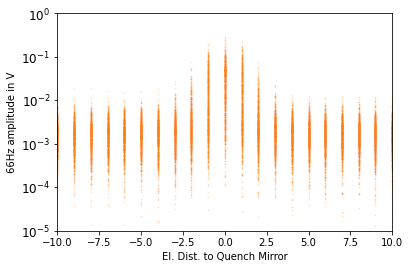

In [38]:
fig, ax = plt.subplots()
df[(df["no_sec_q"]==1)].plot.scatter(ax= ax,x="El. Dist. to Quench Main", y="66Hz_meas_log", s=.5, alpha=0.2,c=default_colors[0])
plt.xlim((-10, 10))

plt.ylabel("66Hz amplitude in V")
df_lim = df.loc[(df["no_sec_q"]==1), "66Hz_meas_log"]
lim = -5, int(df_lim.max())
ax.set_ylim(lim)
ticks = np.arange(lim[0], lim[1]+1)
ax.set_yticks(ticks)
ax.set_yticklabels([f"$10^{{{n}}}$" for n in ticks], fontsize="large")
plt.show()

fig, ax = plt.subplots()
df[(df["no_sec_q"]==1)].plot.scatter(ax= ax,x="El. Dist. to Quench Mirror", y="66Hz_meas_log", s=.5, alpha=0.2,c=default_colors[1])
plt.xlim((-10, 10))

plt.ylabel("66Hz amplitude in V")
df_lim = df.loc[(df["no_sec_q"]==1), "66Hz_meas_log"]
lim = -5, int(df_lim.max())
ax.set_ylim(lim)
ticks = np.arange(lim[0], lim[1]+1)
ax.set_yticks(ticks)
ax.set_yticklabels([f"$10^{{{n}}}$" for n in ticks], fontsize="large")
plt.show()

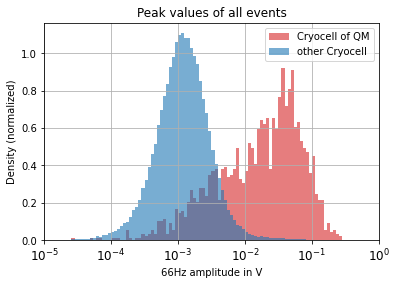

In [39]:
bins= np.linspace(-5, -0.5, 100)

fig, ax = plt.subplots()
df.loc[(df["is_quench_cryostat"]==1) , "66Hz_meas_log"].hist(ax = ax, bins=bins, alpha=0.6, density =True, color=default_colors[3], label = "Cryocell of QM")
df.loc[df["is_quench_cryostat"]==0, "66Hz_meas_log"].hist(ax = ax, bins=bins, alpha=0.6, density =True,  color=default_colors[10], label = "other Cryocell")

plt.legend()
plt.ylabel("Density (normalized)")
plt.xlabel("66Hz_meas_log")


df_lim = df["66Hz_meas_log"]
xlim = -5, int(df_lim.max())
ax.set_xlim(xlim)

xticks = np.arange(xlim[0], xlim[1]+1)
ax.set_xticks(xticks)
ax.set_xticklabels([f"$10^{{{n}}}$" for n in xticks], fontsize="large")

plt.xlabel("66Hz amplitude in V")
plt.title("Peak values of all events")

plt.show()

# 150 Hz

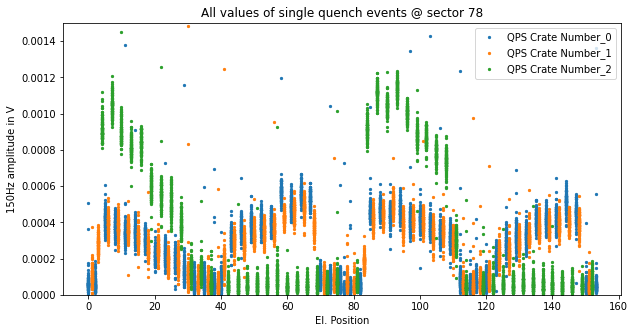

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
hue = ["QPS Crate Number_0","QPS Crate Number_1","QPS Crate Number_2"]

for i, m in enumerate(hue):
    df[(df[m]==1) & (df["Circuit_RB.A81"] == 1) & (df["no_sec_q"] == 1)  ].plot.scatter(ax=ax, x="El. Position", y="150Hz_meas", s=5, c=default_colors[i], alpha=1, label=m)

plt.ylim((0,0.0015))
plt.ylabel("150Hz amplitude in V")
plt.title("All values of single quench events @ sector 78")
plt.legend()

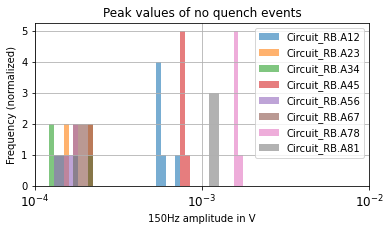

In [41]:
hue = ['Circuit_RB.A12', 'Circuit_RB.A23', 'Circuit_RB.A34',
       'Circuit_RB.A45', 'Circuit_RB.A56', 'Circuit_RB.A67',
       'Circuit_RB.A78', 'Circuit_RB.A81']

fig, ax = plt.subplots(figsize=(6,3))
for i, m in enumerate(hue):
    df[(df[m]==1) & (df["no_sec_q"] == 1) &  (df["is_snapshot"]==1)].groupby("fpa_identifier")["150Hz_meas_log"].max().hist(ax =ax, bins=np.linspace(-4, -2,70), label=m, alpha=0.6)

plt.title("Peak values of no quench events")
plt.legend()

xlim = -4, -2
ax.set_xlim(xlim)

xticks = np.arange(xlim[0], xlim[1]+1)
ax.set_xticks(xticks)
ax.set_xticklabels([f"$10^{{{n}}}$" for n in xticks], fontsize="large")

plt.ylabel("Frequency (normalized)")
plt.xlabel("150Hz amplitude in V")

plt.show()

Text(0.5, 0, '150Hz amplitude in V')

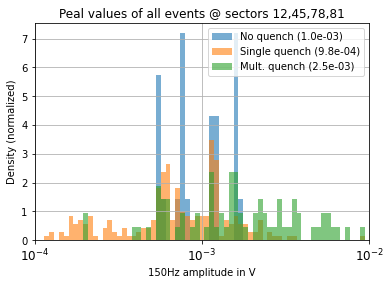

In [62]:
column = "150Hz_meas"
 
circuit_bool = ((df["Circuit_RB.A81"] == 1) | (df["Circuit_RB.A78"] == 1) | (df["Circuit_RB.A12"] == 1)| (df["Circuit_RB.A45"] == 1) ) 


df_no_q_log = df[(df["is_snapshot"]==1) & circuit_bool].groupby("fpa_identifier")[column+"_log"].max()
df_q_log  = df[(df["no_sec_q"]==1) & (df["is_snapshot"]==0)& circuit_bool& (df["Phys. Dist. to Quench"] > 0) ].groupby("fpa_identifier")[column+"_log"].max()
df_mult_q_log  = df[(df["no_sec_q"]==0) & (df["is_snapshot"]==0)& circuit_bool& (df["Phys. Dist. to Quench"] > 0) ].groupby("fpa_identifier")[column+"_log"].max()

df_no_q = df[(df["is_snapshot"]==1)& circuit_bool].groupby("fpa_identifier")[column].max()
df_q = df[(df["no_sec_q"]==1) & (df["is_snapshot"]==0)& circuit_bool& (df["Phys. Dist. to Quench"] > 0) ].groupby("fpa_identifier")[column].max()
df_mult_q = df[(df["no_sec_q"]==0) & (df["is_snapshot"]==0)& circuit_bool& (df["Phys. Dist. to Quench"] > 0) ].groupby("fpa_identifier")[column].max()

fig, ax = plt.subplots()
df_no_q_log.hist(ax=ax, bins=np.linspace(-4, -2,70), alpha=0.6, density =True, label=f"No quench ({df_no_q.mean():.1e})")
df_q_log.hist(ax=ax, bins=np.linspace(-4, -2,70), alpha=0.6, density =True, label=f"Single quench ({df_q.mean():.1e})")
df_mult_q_log.hist(ax=ax, bins=np.linspace(-4, -2,70), alpha=0.6, density =True, label=f"Mult. quench ({df_mult_q.mean():.1e})")

plt.title("Peal values of all events @ sectors 12,45,78,81")

plt.xlabel("150Hz amplitude in V")
plt.legend()

xlim =-4, -2
ax.set_xlim(xlim)

xticks = np.arange(xlim[0], xlim[1]+1)
ax.set_xticks(xticks)
ax.set_xticklabels([f"$10^{{{n}}}$" for n in xticks], fontsize="large")

plt.ylabel("Density (normalized)")
plt.xlabel("150Hz amplitude in V")

# 478Hz

Text(0, 0.5, '478Hz amplitude in V')

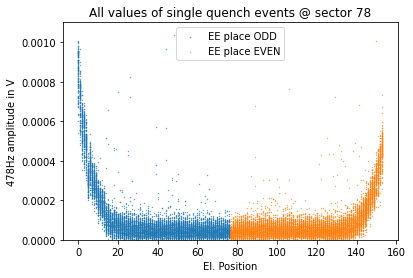

In [43]:
bool_basis = (df["no_sec_q"] == 1) & (df["Circuit_RB.A78"] == 1) &  (df["is_snapshot"]==0)   # &  (df["is_snapshot"]==1) #& (df.I_Q_M > 10500) &(df.dI_dt_from_data < 2) #&  (df["2EE"]==1) 
df_to_corr = df[bool_basis]

fig, ax = plt.subplots()
df_to_corr[df_to_corr['EE place_ODD']==1].plot.scatter(ax= ax, x="El. Position", y="478Hz_meas", s=0.1, c=default_colors[0], label='EE place ODD')
df_to_corr[df_to_corr['EE place_ODD']==0].plot.scatter(ax= ax, x="El. Position", y="478Hz_meas", s=0.1, c=default_colors[1], label='EE place EVEN')

plt.ylim((0,1.1e-3))

plt.title("All values of single quench events @ sector 78")
plt.ylabel("478Hz amplitude in V")

Text(0.5, 0, '478Hz amplitude in V')

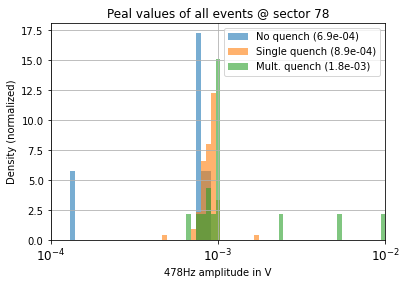

In [44]:
column = "478Hz_meas"
 
circuit_bool =  (df["Circuit_RB.A78"] == 1)

df_no_q_log = df[(df["is_snapshot"]==1) & circuit_bool].groupby("fpa_identifier")[column+"_log"].max()
df_q_log  = df[(df["no_sec_q"]==1) & (df["is_snapshot"]==0)& circuit_bool& (df["Phys. Dist. to Quench"] > 1) ].groupby("fpa_identifier")[column+"_log"].max()
df_mult_q_log  = df[(df["no_sec_q"]==0) & (df["is_snapshot"]==0)& circuit_bool& (df["Phys. Dist. to Quench"] > 1) ].groupby("fpa_identifier")[column+"_log"].max()

df_no_q = df[(df["is_snapshot"]==1)& circuit_bool].groupby("fpa_identifier")[column].max()
df_q = df[(df["no_sec_q"]==1) & (df["is_snapshot"]==0)& circuit_bool& (df["Phys. Dist. to Quench"] > 1) ].groupby("fpa_identifier")[column].max()
df_mult_q = df[(df["no_sec_q"]==0) & (df["is_snapshot"]==0)& circuit_bool& (df["Phys. Dist. to Quench"] > 1) ].groupby("fpa_identifier")[column].max()

fig, ax = plt.subplots()
df_no_q_log.hist(ax=ax, bins=np.linspace(-4, -2,70), alpha=0.6, density =True, label=f"No quench ({df_no_q.mean():.1e})")
df_q_log.hist(ax=ax, bins=np.linspace(-4, -2,70), alpha=0.6, density =True, label=f"Single quench ({df_q.mean():.1e})")
df_mult_q_log.hist(ax=ax, bins=np.linspace(-4, -2,70), alpha=0.6, density =True, label=f"Mult. quench ({df_mult_q.mean():.1e})")

plt.title("Peal values of all events @ sector 78")

plt.xlabel(column+"_log")
plt.legend()

xlim =-4, -2
ax.set_xlim(xlim)

xticks = np.arange(xlim[0], xlim[1]+1)
ax.set_xticks(xticks)
ax.set_xticklabels([f"$10^{{{n}}}$" for n in xticks], fontsize="large")

plt.ylabel("Density (normalized)")
plt.xlabel("478Hz amplitude in V")

# Offset

Text(0.5, 0, '478Hz amplitude in V')

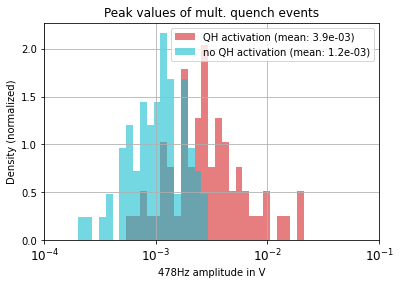

In [45]:
fig, ax = plt.subplots()
df_mult_q_log = df[(df["1EE"]==1) &(df["no_sec_q"]==0) & (df["is_snapshot"]==0)&(df["D_open_1EE"]==0)].groupby("fpa_identifier")["offset_measured_log"].max()
df_qh_log = df[(df["1EE"]==1) &(df["no_sec_q"]==0) & (df["is_snapshot"]==0)&(df["D_open_1EE"]==1)].groupby("fpa_identifier")["offset_measured_log"].max()

df_mult_q = df[(df["1EE"]==1) &(df["no_sec_q"]==0) &(df["no_sec_q"]==0) & (df["is_snapshot"]==0)&(df["D_open_1EE"]==0)].groupby("fpa_identifier")["offset_measured"].max()
df_qh = df[(df["1EE"]==1) &(df["no_sec_q"]==0) & (df["is_snapshot"]==0)&(df["D_open_1EE"]==1)].groupby("fpa_identifier")["offset_measured"].max()

df_qh_log.hist(ax=ax, bins=np.linspace(-4, -1 ,50), alpha=0.6, density =True, label=f"QH activation (mean: {df_qh.mean():.1e})",color=default_colors[3])
df_mult_q_log.hist(ax=ax,  bins=np.linspace(-4, -1,50), alpha=0.6, density =True, label=f"no QH activation (mean: {df_mult_q.mean():.1e})",color=default_colors[9])

plt.legend()
plt.xlabel("offset_measured_log")
plt.title("Peak values of mult. quench events")
#plt.yscale("log")

xlim =-4, -1
ax.set_xlim(xlim)

xticks = np.arange(xlim[0], xlim[1]+1)
ax.set_xticks(xticks)
ax.set_xticklabels([f"$10^{{{n}}}$" for n in xticks], fontsize="large")

plt.ylabel("Density (normalized)")
plt.xlabel("478Hz amplitude in V")

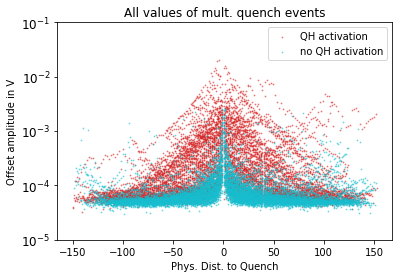

In [46]:
fig, ax = plt.subplots()

df[(df["1EE"]==1) &(df["no_sec_q"]==0) & (df["is_snapshot"]==0)&(df["D_open_1EE"]==1)].plot.scatter(ax= ax,x="Phys. Dist. to Quench", y="offset_measured_log", label="QH activation", s=0.7,c=default_colors[3], alpha=0.5)
df[(df["1EE"]==1) &(df["no_sec_q"]==0) & (df["is_snapshot"]==0)&(df["D_open_1EE"]==0)].plot.scatter(ax= ax,x="Phys. Dist. to Quench", y="offset_measured_log", label="no QH activation", s=0.7, c=default_colors[9], alpha=0.5)
plt.title("All values of mult. quench events")

plt.ylabel("Offset amplitude in V")
df_lim = df.loc[(df["no_sec_q"]==1), "66Hz_meas_log"]
lim = -5, -1
ax.set_ylim(lim)
ticks = np.arange(lim[0], lim[1]+1)
ax.set_yticks(ticks)
ax.set_yticklabels([f"$10^{{{n}}}$" for n in ticks], fontsize="large")
plt.show()

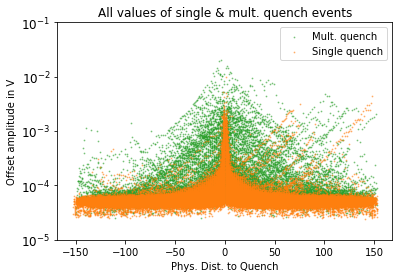

In [63]:
fig, ax = plt.subplots()


df[(df["no_sec_q"]==0) & (df["is_snapshot"]==0)].plot.scatter(ax= ax,x="Phys. Dist. to Quench", y="offset_measured_log", label="Mult. quench", s=0.7, c=default_colors[2], alpha=0.5)
df[(df["no_sec_q"]==1) & (df["is_snapshot"]==0)].plot.scatter(ax= ax,x="Phys. Dist. to Quench", y="offset_measured_log", label="Single quench", s=0.7,c=default_colors[1], alpha=0.5)

plt.title("All values of single & mult. quench events")

plt.ylabel("Offset amplitude in V")
df_lim = df.loc[(df["no_sec_q"]==1), "66Hz_meas_log"]
lim = -5, -1
ax.set_ylim(lim)
ticks = np.arange(lim[0], lim[1]+1)
ax.set_yticks(ticks)
ax.set_yticklabels([f"$10^{{{n}}}$" for n in ticks], fontsize="large")
plt.show()